# **Problem 2**

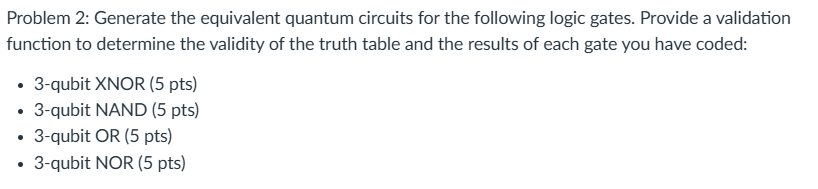

In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit

# Validation Function

The `validate_3input_gate()` function is used to test and verify the correctness of any 3-input quantum logic gate implemented using Qiskit. It takes three arguments: a circuit-generating function that builds the quantum gate for specific inputs (A, B, and C), a classical truth-table function that computes the expected result, and a name for display. The function evaluates all eight possible combinations of input bits (000 to 111). For each combination, it constructs the corresponding quantum circuit, runs it on Qiskit's AerSimulator with 1024 shots, and reads the measurement results. The most frequently observed quantum output is compared against the classical expected output to check whether the gate behaves correctly. The function then prints a formatted truth table showing both the quantum results and the classical values, allowing easy validation that the quantum circuit faithfully implements the intended logical operation.

In [3]:
def validate_3input_gate(make_circuit_fn, classical_fn, name):
    backend = AerSimulator()
    print(f"\n=== Validating {name} (3-input) ===")
    print("A B C | quantum_output  expected")

    for a in [0, 1]:
        for b in [0, 1]:
            for c in [0, 1]:
                qc = make_circuit_fn(a, b, c)
                result = backend.run(qc, shots=1024).result()
                counts = result.get_counts()
                measured = max(counts, key=counts.get)   # '0' or '1'
                expected = str(classical_fn(a, b, c))

                print(f"{a} {b} {c} |       {measured}           {expected}")


#**3-qubit XNOR**

The `make_xnor3_circuit(a, b, c)` function constructs a quantum circuit that implements a 3-input XNOR logic gate using Qiskit. The circuit uses four qubits: three for the input bits (A), (B), and (C), and one output qubit initialized to ∣0⟩. The input values are encoded by applying an X gate to each input qubit whose corresponding classical bit is 1, preparing the quantum register in the correct starting state. The function then computes the XOR of the three inputs by applying a chain of CNOT (controlled-NOT) gates, each using an input qubit as control and the output qubit as the target. Since the output qubit begins in ∣0⟩, these CNOT operations effectively compute A⊕B⊕C into the output qubit. To obtain the XNOR result, which is defined as the logical negation of XOR, the function applies a final X gate to flip the XOR value. The output qubit is then measured into a classical bit so the result can be read after simulation.


In [4]:
def make_xnor3_circuit(a, b, c):
    qc = QuantumCircuit(4, 1)  # 3 inputs, 1 output, 1 classical bit

    # Prepare inputs
    if a: qc.x(0)
    if b: qc.x(1)
    if c: qc.x(2)

    # q3 = A XOR B XOR C
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)

    # XNOR = NOT(XOR)
    qc.x(3)

    # Measure output
    qc.measure(3, 0)
    return qc

**XNOR Checker**

In [5]:
def xnor3_classical(a, b, c):
    return 0 if (a ^ b ^ c) else 1   # 1 when even number of 1s


In [6]:
validate_3input_gate(make_xnor3_circuit, xnor3_classical, "XNOR")


=== Validating XNOR (3-input) ===
A B C | quantum_output  expected
0 0 0 |       1           1
0 0 1 |       0           0
0 1 0 |       0           0
0 1 1 |       1           1
1 0 0 |       0           0
1 0 1 |       1           1
1 1 0 |       1           1
1 1 1 |       0           0


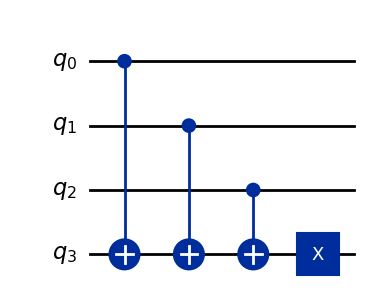

In [7]:
qc_xnor = QuantumCircuit(4, name="XNOR3")  # q0,q1,q2 inputs, q3 output

qc_xnor.cx(0, 3)
qc_xnor.cx(1, 3)
qc_xnor.cx(2, 3)
qc_xnor.x(3)

qc_xnor.draw('mpl')

# **3-qubit NAND**

The `make_nand3_circuit(a, b, c)` function creates a quantum circuit that implements a 3-input NAND gate. The circuit uses four qubits, where the first three qubits represent the inputs (A), (B), and (C), and the fourth qubit acts as the output, initially set to ∣0⟩. The input values are loaded into the quantum circuit by applying X gates to q0, q1, and q2 whenever the corresponding classical inputs (a), (b), or (c) are equal to 1. To compute the logical AND of the three inputs, the circuit applies a multi-controlled X gate (`mcx`) using the three input qubits as controls and the output qubit as the target. This operation flips the output qubit only when (A), (B), and (C) are all 1, effectively encoding the AND result into q3. Since a NAND gate produces the negation of the AND operation, the circuit then applies an X gate to the output qubit, turning the AND result into ¬(𝐴∧𝐵∧𝐶). Finally, the output qubit is measured into a classical bit so the resulting NAND value can be read after simulation.


In [8]:
def make_nand3_circuit(a, b, c):
    qc = QuantumCircuit(4, 1)

    if a: qc.x(0)
    if b: qc.x(1)
    if c: qc.x(2)

    # q3 ^= (A AND B AND C)
    qc.mcx([0, 1, 2], 3)

    # NAND = NOT(AND)
    qc.x(3)

    qc.measure(3, 0)
    return qc


**NAND Checker**

In [9]:
def nand3_classical(a, b, c):
    return 0 if (a and b and c) else 1


In [10]:
validate_3input_gate(make_nand3_circuit, nand3_classical, "NAND")


=== Validating NAND (3-input) ===
A B C | quantum_output  expected
0 0 0 |       1           1
0 0 1 |       1           1
0 1 0 |       1           1
0 1 1 |       1           1
1 0 0 |       1           1
1 0 1 |       1           1
1 1 0 |       1           1
1 1 1 |       0           0


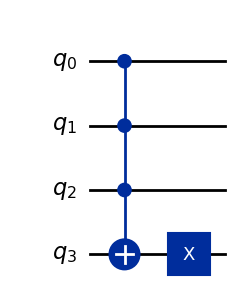

In [11]:
qc_nand = QuantumCircuit(4, name="NAND3")

# q3 ^= (A AND B AND C)
qc_nand.mcx([0, 1, 2], 3)

# NAND = NOT(AND)
qc_nand.x(3)


qc_nand.draw('mpl')

# **3-qubit OR**

The `make_or3_circuit(a, b, c)` function constructs a quantum circuit that implements a reversible 3-input OR gate using Qiskit. The circuit uses four qubits: three for the inputs (A), (B), and (C), and one ancilla qubit initialized to ∣0⟩ to hold the output. The input bits are loaded by applying X gates to the corresponding input qubits whenever the classical inputs (a), (b), or (c) equal 1. To compute the OR operation in a reversible way, the circuit leverages De Morgan’s law, which states that A∨B∨C=¬(¬A∧¬B∧¬C). First, the circuit negates each input qubit using X gates, producing ¬A, ¬𝐵, and ¬𝐶. It then applies a multi-controlled X gate (`mcx`) targeting the output qubit, which flips the output only when all negated inputs are 1—equivalent to computing ¬A ∧ ¬B ∧ ¬C. A single X gate is then applied to the output to negate this value, yielding the desired OR result. Finally, the input qubits are restored to their original values by applying X gates again, ensuring the circuit remains reversible. The output qubit is measured into a classical bit so that the OR result can be retrieved after simulation.


In [12]:
def make_or3_circuit(a, b, c):
    qc = QuantumCircuit(4, 1)

    if a: qc.x(0)
    if b: qc.x(1)
    if c: qc.x(2)

    # Negate inputs
    qc.x(0)
    qc.x(1)
    qc.x(2)

    # q3 ^= (¬A AND ¬B AND ¬C)
    qc.mcx([0, 1, 2], 3)

    # OR = NOT(¬A AND ¬B AND ¬C)
    qc.x(3)

    # Restore inputs
    qc.x(0)
    qc.x(1)
    qc.x(2)

    qc.measure(3, 0)
    return qc


**OR Checker**

In [13]:
def or3_classical(a, b, c):
    return 1 if (a or b or c) else 0

In [14]:
validate_3input_gate(make_or3_circuit,   or3_classical,   "OR")


=== Validating OR (3-input) ===
A B C | quantum_output  expected
0 0 0 |       0           0
0 0 1 |       1           1
0 1 0 |       1           1
0 1 1 |       1           1
1 0 0 |       1           1
1 0 1 |       1           1
1 1 0 |       1           1
1 1 1 |       1           1


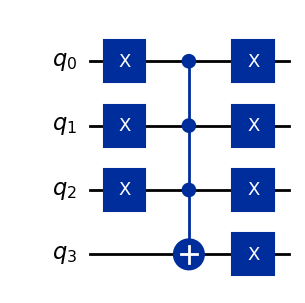

In [15]:
qc_or = QuantumCircuit(4, name="OR3")

# Negate inputs
qc_or.x(0)
qc_or.x(1)
qc_or.x(2)

# q3 ^= (¬A AND ¬B AND ¬C)
qc_or.mcx([0, 1, 2], 3)

# OR = NOT(¬A AND ¬B AND ¬C)
qc_or.x(3)

# Restore inputs
qc_or.x(0)
qc_or.x(1)
qc_or.x(2)

qc_or.draw('mpl')

# **3-qubit NOR**

The `make_nor3_circuit(a, b, c)` function builds a reversible quantum circuit that implements a 3-input NOR gate using Qiskit. The circuit contains four qubits: three qubits that represent the classical inputs (A), (B), and (C), and a fourth qubit initialized to ∣0⟩ that will store the final output. The classical input values are encoded into the quantum circuit by applying X gates to the appropriate input qubits whenever the corresponding input bit is 1. To compute the NOR operation in a reversible manner, the function uses De Morgan’s law, which defines NOR(A,B,C)=¬A∧¬B∧¬C. Accordingly, each input qubit is first negated using an X gate, converting the inputs to ¬A, ¬B, and ¬C. A multi-controlled X gate (`mcx`) is then applied with the three negated inputs as controls and the output qubit as the target. This gate flips the output qubit only when all three negated inputs are 1, which corresponds exactly to the NOR condition where none of the original inputs are 1. After computing this result, the function restores the input qubits to their original values by applying X gates again, preserving the reversibility requirement of quantum circuits. Finally, the output qubit is measured into a classical bit so the NOR result can be read after simulation.


In [16]:
def make_nor3_circuit(a, b, c):
    qc = QuantumCircuit(4, 1)

    if a: qc.x(0)
    if b: qc.x(1)
    if c: qc.x(2)

    # Negate inputs
    qc.x(0)
    qc.x(1)
    qc.x(2)

    # q3 ^= (¬A AND ¬B AND ¬C) = NOR(A,B,C)
    qc.mcx([0, 1, 2], 3)

    # Restore inputs
    qc.x(0)
    qc.x(1)
    qc.x(2)

    qc.measure(3, 0)
    return qc


**NOR Checker**

In [17]:
def nor3_classical(a, b, c):
    return 1 if not (a or b or c) else 0


In [18]:
validate_3input_gate(make_nor3_circuit,  nor3_classical,  "NOR")


=== Validating NOR (3-input) ===
A B C | quantum_output  expected
0 0 0 |       1           1
0 0 1 |       0           0
0 1 0 |       0           0
0 1 1 |       0           0
1 0 0 |       0           0
1 0 1 |       0           0
1 1 0 |       0           0
1 1 1 |       0           0


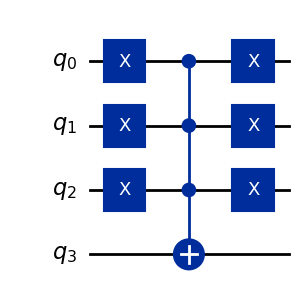

In [19]:
qc_nor = QuantumCircuit(4, name="NOR3")

# Negate inputs
qc_nor.x(0)
qc_nor.x(1)
qc_nor.x(2)

# q3 ^= (¬A AND ¬B AND ¬C) = NOR
qc_nor.mcx([0, 1, 2], 3)

# Restore inputs
qc_nor.x(0)
qc_nor.x(1)
qc_nor.x(2)

qc_nor.draw('mpl')